11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3859 - val_loss: 0.1878
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1779 - val_loss: 0.1529
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1488 - val_loss: 0.1341
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1318 - val_loss: 0.1215
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1203 - val_loss: 0.1130
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1128 - val_loss: 0.1070
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1067 - val_loss: 0.1023
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1025 - val_loss: 0.0991
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0996 - val_loss: 0.0968
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0977 - val_loss: 0.0953
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


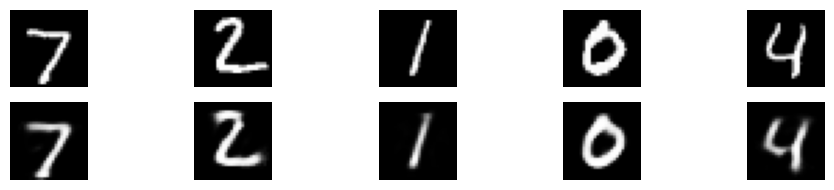

In [1]:
# Deep Learning Assignment
# Author: Arvind
# University: University of Central Missouri

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.metrics import confusion_matrix, classification_report
import string
import random

# Q1: Basic Autoencoder
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Encoder-Decoder Architecture
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Plot original vs reconstructed
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(10, 2))
for i in range(5):
    # original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    # reconstructed
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.tight_layout()
plt.savefig("q1_reconstruction.png")

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1810 - val_loss: 0.1356
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1356 - val_loss: 0.1303
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1308 - val_loss: 0.1278
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1287 - val_loss: 0.1265
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1273 - val_loss: 0.1254
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1264 - val_loss: 0.1249
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1254 - val_loss: 0.1244
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1251 - val_loss: 0.1240
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1246 - val_loss: 0.1238
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1246 - val_loss: 0.1236
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


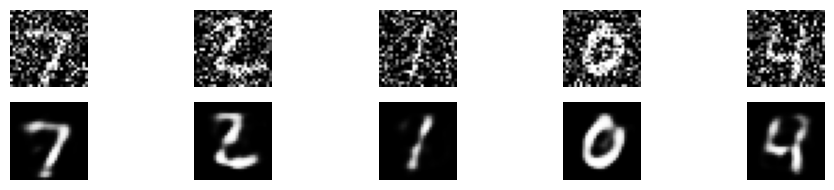

In [2]:
# Q2: Denoising Autoencoder
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

denoising_autoencoder = Model(input_img, decoded)  # reuse same model arch
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
denoising_autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Plot noisy vs denoised
decoded_noisy = denoising_autoencoder.predict(x_test_noisy)
plt.figure(figsize=(10, 2))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.tight_layout()
plt.savefig("q2_denoising.png")

In [10]:
# Q3: Implementing an RNN for Text Generation
url = "https://www.gutenberg.org/files/100/100-0.txt"
response = requests.get(url)
text = response.text.lower()[:500000]  # Use only first 500k characters


maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(sentences)
x = pad_sequences(sequences, maxlen=maxlen)
y = np.array([tokenizer.word_index[char] for char in next_chars])
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

model = tf.keras.models.Sequential([
    Embedding(vocab_size, 50, input_length=maxlen),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(vocab_size, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x, y, batch_size=128, epochs=5)

def generate_text(seed_text, length=400, temperature=1.0):
    generated = ''
    seed = seed_text.lower()
    for _ in range(length):
        tokenized = tokenizer.texts_to_sequences([seed])
        tokenized = pad_sequences(tokenized, maxlen=maxlen)
        preds = model.predict(tokenized, verbose=0)[0]
        preds = np.asarray(preds).astype('float64')
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        next_idx = np.random.choice(range(vocab_size), p=preds)

        # Reverse lookup
        next_char = ' '
        for char, idx in tokenizer.word_index.items():
            if idx == next_idx:
                next_char = char
                break

        generated += next_char
        seed = seed[1:] + next_char
    return generated

# Save a sample of generated text
with open("q3_generated_text.txt", "w") as f:
    f.write(generate_text("shall i compare thee to a summer's day?"))

Epoch 1/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 342s 260ms/step - loss: 2.7863
Epoch 2/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 336s 258ms/step - loss: 2.0899
Epoch 3/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 382s 258ms/step - loss: 1.9362
Epoch 4/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 380s 256ms/step - loss: 1.8255
Epoch 5/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 381s 256ms/step - loss: 1.7603


In [12]:
#Q4: Sentiment Classification Using RNN
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, SpatialDropout1D, GlobalAveragePooling1D
max_features = 20000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = tf.keras.models.Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test))

y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save results
with open("q4_sentiment_classification.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 482s 610ms/step - accuracy: 0.7056 - loss: 0.5548 - val_accuracy: 0.8417 - val_loss: 0.3709
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 518s 631ms/step - accuracy: 0.8374 - loss: 0.3781 - val_accuracy: 0.8099 - val_loss: 0.4458
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step
[[11095  1405]
 [ 3347  9153]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82     12500
           1       0.87      0.73      0.79     12500

    accuracy                           0.81     25000
   macro avg       0.82      0.81      0.81     25000
weighted avg       0.82      0.81      0.81     25000

